In [1]:
import os
os.environ['MANTLE_TARGET'] = 'ice40'
import magma as m
from mantle import DFF

main = m.DefineCircuit('main', 'I', m.In(m.Bit), 'O', m.Out(m.Bit), 'CLK', m.In(m.Bit))

# create ff holding state first
ff = DFF()

# compute the next state
ff( main.I ^ ff.O )

m.wire(ff.O, main.O)
m.wire(main.CLK, ff.CLK)

m.EndDefine()

import mantle lattice ice40
import mantle lattice mantle40


In [2]:
from magma.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(main)
scope = Scope()
inputs = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
waveforms = []
for i in range(len(inputs)):
    simulator.set_value(main.I, scope, bool(inputs[i]))
    for j in range(2):
        simulator.step()
        simulator.evaluate()
        clk = simulator.get_value(main.CLK, scope)
        O = simulator.get_value(main.O, scope)
        waveforms.append([O, bool(inputs[i]), clk])

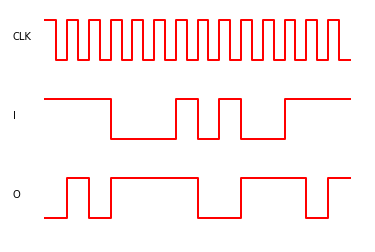

In [3]:
from magma.waveform import waveform

waveform(waveforms, ["O", "I", "CLK"])

In [4]:
m.compile("build/tff", main, include_coreir=True)

compiling main


In [5]:
with open("build/tff.v", "r") as tff_verilog:
    print(tff_verilog.read())

`include "/Users/lenny/repos/magma/magma/backend/coreir_prims.v"
module main (input  I, output  O, input  CLK);
wire  inst0_Q;
wire  inst1_out;
SB_DFF inst0 (.C(CLK), .D(inst1_out), .Q(inst0_Q));
coreir_bitxor inst1 (.in0(I), .in1(inst0_Q), .out(inst1_out));
assign O = inst0_Q;
endmodule


